## 畳み込みニューラルネットワーク (Convolutional Neural Networks)

https://www.tensorflow.org/tutorials/images/intro_to_cnns?hl=ja

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1519 - accuracy: 0.9531
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0476 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0208 - accuracy: 0.9933


## OpenMP のエラー対策
#### os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized.</br>
OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue 
to execute, but that may cause crashes or silently produce incorrect results. For 
more information, please see http://www.intel.com/software/products/support/. 

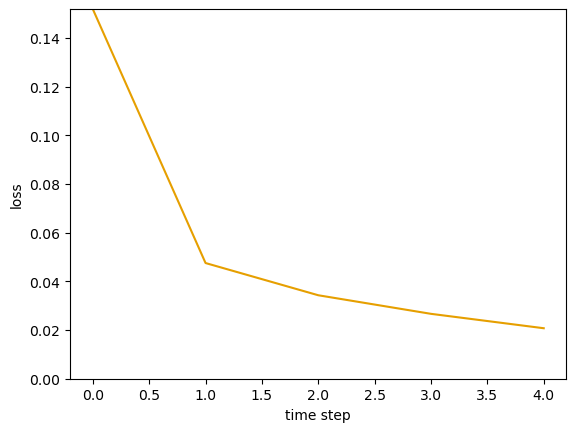

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import matplotlib.pyplot as plt

# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(history.history['loss']))

# 損失関数の時間変化を描画
plt.plot(history.history['loss'], c='#E69F00')

# 描画したグラフを表示
plt.show()

In [3]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0312 - accuracy: 0.9910


In [4]:
model.save("mnist_cnn.h5",save_format='h5')

In [5]:
new_model = tf.keras.models.load_model('mnist_cnn.h5')

In [6]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0312 - accuracy: 0.9910


### mnist-cnn-h5

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
 
# 表示エリアの背景をシルバーにセット
fig = plt.figure()
fig.patch.set_facecolor('silver')
 
# 0～9の10枚の画像をそれぞれ3枚ずつ、計30枚描画
for i in range(10):
    for j in range(3):
        # 数字iの画像のうち、j枚目を取り出す
        img = train_images[train_labels==i][j]
        #ランダムに取り出したい場合は下記を有効に
        # img = train_images[train_labels==i][np.random.randint(0, len(train_images[train_labels==i]))]
        # 縦5x横6の画像表示エリアのうち、3*i+j+1番目に描画
        plt.subplot(5, 6, 3*i + j + 1)
        # グラフとしての軸は描画しない
        plt.axis('off')
        # 白黒を反転した状態で描画      
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        # 各画像にタイトルを描画
        plt.title('Data {0}'.format(i))
 
# 画像間に余裕をもたせて描画
plt.tight_layout()
 
# 描画した内容を画面表示
#plt.savefig("mnist-datasets.png")
plt.show()

### mnist-cnn-gui-tf2

In [7]:
## -*- coding: utf-8 -*-
#  手書き数字を中央に補正する
#　マウスで描画する際の一点の直径を30から20に変更

#from tensorflow.keras import keras
#from tensorflow.keras import backend as K
import numpy as np
import tensorflow as tf
#import sys
from PIL import Image, ImageTk, ImageDraw, ImageFilter
# try:
#     import Tkinter as tk
# except ImportError:
import tkinter as tk  # for Python 3

# 入力画像の次元
#img_rows, img_cols = 8, 8
img_rows, img_cols = 28, 28

# pixel の最大値
#pixel_max = 16
pixel_max = 255

# 学習済ファイルの確認
#savefile = "mnist_cnn"
savefile = "mnist_cnn.h5"
#if len(sys.argv)==1:
#    print('使用法: python ml-10-06-digits-cnn-gui-mod.py 学習済ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]

# 学習済ファイルを読み込んでmodelを作成
model = tf.keras.models.load_model(savefile)

##### 以下はGUIアプリケーション用の内容

class Application(tk.Frame):
    # 初期化用関数
    def __init__(self, master=None):
        tk.Frame.__init__(self, master)
        self.pack()
        self.w = 200 # 一つの描画領域の幅
        self.h = 200 # 一つの描画領域の高さ
        self.d = 30  # マウスで描画する際の一点の直径
        self.create_widgets()

    # 様々なGUI部品を構築
    def create_widgets(self):
        w = self.w
        h = self.h
        # マウスで描画するための領域
        self.canvas = tk.Canvas(self, width=w, height=h, bg='white')
        # self.canvasを左端に配置
        self.canvas.grid(row=0, column=0)
        # self.canvasでマウスが動いた際にself.draw_digitが実行されるよう設定
        self.canvas.bind('<Button1-Motion>', self.draw_digit)

        # 認識用に用いる画像(self.canvasと共通化不能)
        self.img = Image.new('L', (w, h), color=255)
        # self.img上に描画するために必要なdraw
        self.draw = ImageDraw.Draw(self.img)

        # 認識用に self.img を加工して表示するキャンバス
        self.recog_canvas = tk.Canvas(self, width=w, height=h, bg='white')
        # self.recog_canvas上に描画するための画像を生成して関連付け
        self.recog_img = tk.PhotoImage(width=w, height=h)
        self.recog_canvas.create_image((w/2,h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img
        # self.canvasを中央に配置
        self.recog_canvas.grid(row=0, column=1)

        # 結果表示用のキャンバス
        self.digit_canvas = tk.Canvas(self, width=w, height=h, bg='gray')
        # self.digit_canvasを右端に配置
        self.digit_canvas.grid(row=0, column=2)

        # 認識ボタン
        self.recog_btn = tk.Button(self, text='認識', command=self.recog)
        # 認識ボタンを下段左に配置
        self.recog_btn.grid(row=1, column=0)
        # クリアボタン
        self.clear_btn = tk.Button(self, text='クリア', command=self.clear)
        # クリアボタンを下段右に配置
        self.clear_btn.grid(row=1, column=2)

    # 認識ボタンが押されたときに実行される関数
    def recog(self):
        w = self.w
        h = self.h
        recog_img = self.img
        # 位置と大きさを補正されたイメージを28x28のrecog_imgに縮小
        recog_img = recog_img.resize(size=(img_rows,img_cols), resample=Image.BICUBIC)
        # (28,28)のrecog_imgを描画用に拡大
        recog_img_large = recog_img.resize(size=(w, h))
        self.recog_img = ImageTk.PhotoImage(image=recog_img_large)
        self.recog_canvas.create_image((w/2, h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img

        # 28x28の画像を機械学習用に加工
        X = np.asarray(recog_img, dtype=np.float32)
        # 白黒反転
        X = 255 - X
        X = X / 255.0 
        # Tensorflow 2 最終層にsoftmaxがあるので直接インスタンスで呼び出し
        y = model(X.reshape(1,img_rows,img_cols,1))
        y = [np.argmax(y.numpy())]
        # 予測結果を右の領域の表示
        self.digit_canvas.create_text(w/2, h/2, text = '{0:d}'.format(y[0]), fill='white', font = ('FixedSys', int(w/2)))

    # クリアボタンが押されたときに実行される関数
    def clear(self):
        w = self.w
        h = self.h
        # 左の描画領域をクリア
        self.canvas.delete('all')
        self.draw.rectangle(xy=[0,0,w,h], 
                            outline='white', fill='white')
        # 中央の認識領域をクリア
        self.recog_canvas.delete('all')
        self.recog_img = tk.PhotoImage(width=w, height=h)
        self.recog_canvas.create_image((w/2,h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img
        # 右の結果表示領域をクリア
        self.digit_canvas.delete('all')
        # 描画の座標の最小値と最大値をクリア
        self.drawxmin = w  # 描画のxの最小座標（補正用）
        self.drawxmax = 0  # 描画のxの最大座標（補正用）
        self.drawymin = h  # 描画のyの最小座標（補正用）
        self.drawymax = 0  # 描画のyの最大座標（補正用）

    # 左側の描画領域でマウスが動いたときに呼ばれる関数
    def draw_digit(self,event):
        d = self.d
        x = event.x
        y = event.y
        # 描画領域に黒丸を描画
        id=self.canvas.create_oval(x-d/2, y-d/2, x+d/2, y+d/2)
        self.canvas.itemconfigure(id, fill='black')
        # 認識用の画像に黒丸を描画
        self.draw.ellipse(xy=[x-d/2, y-d/2, x+d/2, y+d/2], fill=0, outline=0) 

root = tk.Tk()
app = Application(master=root)
app.master.title('数字認識（ディープラーニング版）')
app.mainloop()




### mnist-cnn-gui-mod-cent-tf2

In [8]:
## -*- coding: utf-8 -*-
#  手書き数字を中央に補正する
#　マウスで描画する際の一点の直径を30から20に変更

#from tensorflow.keras import keras
#from tensorflow.keras import backend as K
import numpy as np
import tensorflow as tf
#import sys
from PIL import Image, ImageTk, ImageDraw, ImageFilter
# try:
#     import Tkinter as tk
# except ImportError:
import tkinter as tk  # for Python 3

# 入力画像の次元
#img_rows, img_cols = 8, 8
img_rows, img_cols = 28, 28

# pixel の最大値
#pixel_max = 16
pixel_max = 255

# 学習済ファイルの確認
#savefile = "mnist_cnn"
savefile = "mnist_cnn.h5"
#if len(sys.argv)==1:
#    print('使用法: python ml-10-06-digits-cnn-gui-mod.py 学習済ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]

# 学習済ファイルを読み込んでmodelを作成
model = tf.keras.models.load_model(savefile)

##### 以下はGUIアプリケーション用の内容

class Application(tk.Frame):
    # 初期化用関数
    def __init__(self, master=None):
        tk.Frame.__init__(self, master)
        self.pack()
        self.w = 200 # 一つの描画領域の幅
        self.h = 200 # 一つの描画領域の高さ
        self.d = 30  # マウスで描画する際の一点の直径
        #self.d = 20  # マウスで描画する際の一点の直径
        self.drawxmin = self.w  # 描画のxの最小座標（補正用）
        self.drawxmax = 0       # 描画のxの最大座標（補正用）
        self.drawymin = self.h  # 描画のyの最小座標（補正用）
        self.drawymax = 0       # 描画のyの最大座標（補正用）
        self.create_widgets()

    # 様々なGUI部品を構築
    def create_widgets(self):
        w = self.w
        h = self.h
        # マウスで描画するための領域
        self.canvas = tk.Canvas(self, width=w, height=h, bg='white')
        # self.canvasを左端に配置
        self.canvas.grid(row=0, column=0)
        # self.canvasでマウスが動いた際にself.draw_digitが実行されるよう設定
        self.canvas.bind('<Button1-Motion>', self.draw_digit)

        # 認識用に用いる画像(self.canvasと共通化不能)
        self.img = Image.new('L', (w, h), color=255)
        # self.img上に描画するために必要なdraw
        self.draw = ImageDraw.Draw(self.img)

        # 認識用に self.img を加工して表示するキャンバス
        self.recog_canvas = tk.Canvas(self, width=w, height=h, bg='white')
        # self.recog_canvas上に描画するための画像を生成して関連付け
        self.recog_img = tk.PhotoImage(width=w, height=h)
        self.recog_canvas.create_image((w/2,h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img
        # self.canvasを中央に配置
        self.recog_canvas.grid(row=0, column=1)

        # 結果表示用のキャンバス
        self.digit_canvas = tk.Canvas(self, width=w, height=h, bg='gray')
        # self.digit_canvasを右端に配置
        self.digit_canvas.grid(row=0, column=2)

        # 認識ボタン
        self.recog_btn = tk.Button(self, text='認識', command=self.recog)
        # 認識ボタンを下段左に配置
        self.recog_btn.grid(row=1, column=0)
        # クリアボタン
        self.clear_btn = tk.Button(self, text='クリア', command=self.clear)
        # クリアボタンを下段右に配置
        self.clear_btn.grid(row=1, column=2)

    # 認識ボタンが押されたときに実行される関数
    def recog(self):
        w = self.w
        h = self.h
        # 描画されたイメージを28x28のrecog_imgに縮小
        # 描画されたイメージを中央に移動
        if self.drawxmin<self.drawxmax and self.drawymin<self.drawymax:
            recog_img = Image.new('L', (w, h), color=255)
                
            hr = int((self.drawymax - self.drawymin))
            wr = int((self.drawxmax - self.drawxmin))
            h0 = int((h-hr)/2)
            w0 = int((w-wr)/2)
            tmp_img = self.img.crop((self.drawxmin, self.drawymin, self.drawxmax, self.drawymax))
            tmp_img = tmp_img.resize(size=(wr, hr), resample=Image.BICUBIC)
            recog_img.paste(tmp_img, (w0, h0, w0+wr, h0+hr))
            #recog_img_large = recog_img
        else:
            recog_img = self.img
        # 位置と大きさを補正されたイメージを28x28のrecog_imgに縮小
        recog_img = recog_img.resize(size=(img_rows,img_cols), resample=Image.BICUBIC)
        # (28,28)のrecog_imgを描画用に拡大
        recog_img_large = recog_img.resize(size=(w, h))
        self.recog_img = ImageTk.PhotoImage(image=recog_img_large)
        self.recog_canvas.create_image((w/2, h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img

        # 28x28の画像を機械学習用に加工
        X = np.asarray(recog_img, dtype=np.float32)
        # 白黒反転
        X = 255 - X
        X = X / 255.0 
        # Tensorflow 2 最終層にsoftmaxがあるので直接インスタンスで呼び出し
        y = model(X.reshape(1,img_rows,img_cols,1))
        y = [np.argmax(y.numpy())]
        # 予測結果を右の領域の表示
        self.digit_canvas.create_text(w/2, h/2, text = '{0:d}'.format(y[0]), fill='white', font = ('FixedSys', int(w/2)))

    # クリアボタンが押されたときに実行される関数
    def clear(self):
        w = self.w
        h = self.h
        # 左の描画領域をクリア
        self.canvas.delete('all')
        self.draw.rectangle(xy=[0,0,w,h], 
                            outline='white', fill='white')
        # 中央の認識領域をクリア
        self.recog_canvas.delete('all')
        self.recog_img = tk.PhotoImage(width=w, height=h)
        self.recog_canvas.create_image((w/2,h/2), image=self.recog_img, state='normal')
        self.recog_canvas.image = self.recog_img
        # 右の結果表示領域をクリア
        self.digit_canvas.delete('all')
        # 描画の座標の最小値と最大値をクリア
        self.drawxmin = w  # 描画のxの最小座標（補正用）
        self.drawxmax = 0  # 描画のxの最大座標（補正用）
        self.drawymin = h  # 描画のyの最小座標（補正用）
        self.drawymax = 0  # 描画のyの最大座標（補正用）

    # 左側の描画領域でマウスが動いたときに呼ばれる関数
    def draw_digit(self,event):
        d = self.d
        x = event.x
        y = event.y
        # 描画領域に黒丸を描画
        id=self.canvas.create_oval(x-d/2, y-d/2, x+d/2, y+d/2)
        self.canvas.itemconfigure(id, fill='black')
        # 認識用の画像に黒丸を描画
        self.draw.ellipse(xy=[x-d/2, y-d/2, x+d/2, y+d/2], fill=0, outline=0) 
        # 描画最小座標と最大座標を更新
        if x-d/2 < self.drawxmin:
            self.drawxmin = max(x-d/2, 0)
        if x+d/2 > self.drawxmax:
            self.drawxmax = min(x+d/2, self.w)
        if y-d/2 < self.drawymin:
            self.drawymin = max(y-d/2, 0)
        if y+d/2 > self.drawymax:
            self.drawymax = min(y+d/2, self.h)

root = tk.Tk()
app = Application(master=root)
app.master.title('数字認識（ディープラーニング版、中央補正あり）')
app.mainloop()


